# Analyzing Online Shopping Behavior
>  **Summary:** 
<br>This file contains an Analysis of Online Shopping Behavior of people from different cities in India. Data from different individuals was collected through a google form. All the responses were saved in a .xlsx file, got 410 responses from the survey. Further on Pandas is used for preprocessing and rearranging data. The Analysis contains graphs, market basket model for descriptive analysis. This also file contains a neural netwrok to predict the catgories one would buy. Further on is contains the observations and Results to the analysis.

In [1]:
#Importing the required Modules.
import pandas as pd
import seaborn as sns
import numpy as np

In [57]:
#Reading the Dataset
df = pd.read_excel(r"C:\Users\Shubham\OneDrive\Desktop\Projects\Pt\Data\Survey responses.xlsx")
df

,Age,Gender,State,City,Category
0,20,Female,Daman and Diu,Tier 3,"Books, Mobiles & Accessories, E-Learning Cours..."
1,34,Female,Delhi,Tier 1,"Mobiles & Accessories, Bags, Wallets & Belts, ..."
2,28,Male,Delhi,Tier 1,"Books, Mobiles & Accessories, Watches, Footwear"
3,26,Male,Delhi,Tier 1,Mobiles & Accessories
4,26,Female,Delhi,Tier 1,"Books, Mobiles & Accessories, E-Learning Cours..."
...,...,...,...,...,...
406,18,Male,West Bengal,Tier 1,Mobiles & Accessories
407,18,Male,West Bengal,Tier 1,"Books, Mobiles & Accessories, Bags, Wallets & ..."
408,18,Male,West Bengal,Tier 2,"Mobiles & Accessories, Clothing"
409,14,Male,West Bengal,Tier 1,"Books, Mobiles & Accessories, E-Learning Cours..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       411 non-null    int64 
 1   Gender    411 non-null    object
 2   State     411 non-null    object
 3   City      411 non-null    object
 4   Category  411 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.2+ KB


In [4]:
df.describe(include="all")

,Age,Gender,State,City,Category
count,411.000000,411,411,411,411
unique,NaN,2,14,3,174
top,NaN,Male,Uttar Pradesh,Tier 2,Books
freq,NaN,251,253,226,36
mean,20.732360,NaN,NaN,NaN,NaN
std,2.937794,NaN,NaN,NaN,NaN
min,12.000000,NaN,NaN,NaN,NaN
25%,19.000000,NaN,NaN,NaN,NaN
50%,20.000000,NaN,NaN,NaN,NaN
75%,21.000000,NaN,NaN,NaN,NaN


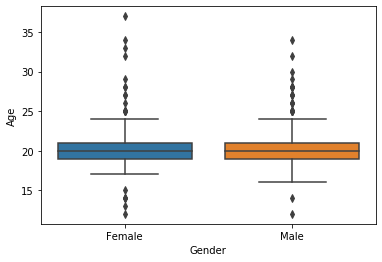

In [5]:
sns.boxplot(x="Gender", y="Age", data=df)

In [6]:
#Checking Age the distribution 
q1=df.quantile(0.25)
print("Q1 :",q1)
q3=df.quantile(0.75)
print("Q3 :",q3)
IQR=q3-q1
print("IQR :",IQR)
whisker=(IQR*1.5)+q3
print("Length of Upper Whisker :",whisker)

Q1 : Age    19.0
Name: 0.25, dtype: float64
Q3 : Age    21.0
Name: 0.75, dtype: float64
IQR : Age    2.0
dtype: float64
Length of Upper Whisker : Age    24.0
dtype: float64


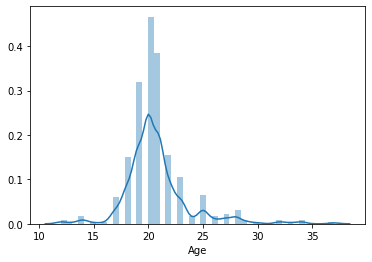

In [7]:
sns.distplot(df['Age'])

In [8]:
#Making individual columns for respective categories.
li=["Mobiles & Accessories","Books","E-Learning Courses","Bags, Wallets & Belts","Watches","OTT Subscriptions","Footwear","Exercise & Fitness","Eyewear","Automation & Robotics","Clothing"]
for a in li:
    df.loc[df["Category"].str.contains(a), a] = True

In [9]:
df

,Age,Gender,State,City,Category,Mobiles & Accessories,Books,E-Learning Courses,"Bags, Wallets & Belts",Watches,OTT Subscriptions,Footwear,Exercise & Fitness,Eyewear,Automation & Robotics,Clothing
0,20,Female,Daman and Diu,Tier 3,"Books, Mobiles & Accessories, E-Learning Cours...",True,True,True,True,True,NaN,True,NaN,NaN,NaN,True
1,34,Female,Delhi,Tier 1,"Mobiles & Accessories, Bags, Wallets & Belts, ...",True,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True
2,28,Male,Delhi,Tier 1,"Books, Mobiles & Accessories, Watches, Footwear",True,True,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN
3,26,Male,Delhi,Tier 1,Mobiles & Accessories,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26,Female,Delhi,Tier 1,"Books, Mobiles & Accessories, E-Learning Cours...",True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,18,Male,West Bengal,Tier 1,Mobiles & Accessories,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,18,Male,West Bengal,Tier 1,"Books, Mobiles & Accessories, Bags, Wallets & ...",True,True,NaN,True,True,NaN,True,NaN,NaN,NaN,True
408,18,Male,West Bengal,Tier 2,"Mobiles & Accessories, Clothing",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
409,14,Male,West Bengal,Tier 1,"Books, Mobiles & Accessories, E-Learning Cours...",True,True,True,True,True,NaN,True,True,NaN,NaN,NaN


In [10]:
#replacing Nan with 0 or false.
df=df.fillna(False)

In [11]:
#we dont need category column anymore.
df = df.drop('Category',axis=1)
df

,Age,Gender,State,City,Mobiles & Accessories,Books,E-Learning Courses,"Bags, Wallets & Belts",Watches,OTT Subscriptions,Footwear,Exercise & Fitness,Eyewear,Automation & Robotics,Clothing
0,20,Female,Daman and Diu,Tier 3,True,True,True,True,True,False,True,False,False,False,True
1,34,Female,Delhi,Tier 1,True,False,False,True,False,False,True,False,False,False,True
2,28,Male,Delhi,Tier 1,True,True,False,False,True,False,True,False,False,False,False
3,26,Male,Delhi,Tier 1,True,False,False,False,False,False,False,False,False,False,False
4,26,Female,Delhi,Tier 1,True,True,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,18,Male,West Bengal,Tier 1,True,False,False,False,False,False,False,False,False,False,False
407,18,Male,West Bengal,Tier 1,True,True,False,True,True,False,True,False,False,False,True
408,18,Male,West Bengal,Tier 2,True,False,False,False,False,False,False,False,False,False,True
409,14,Male,West Bengal,Tier 1,True,True,True,True,True,False,True,True,False,False,False


In [12]:
#Count category, an individual shops.
df['Category Shopped'] = df[li].values.sum(axis = 1) 

In [13]:
#Dataframe we gonna use for analysis.
df

,Age,Gender,State,City,Mobiles & Accessories,Books,E-Learning Courses,"Bags, Wallets & Belts",Watches,OTT Subscriptions,Footwear,Exercise & Fitness,Eyewear,Automation & Robotics,Clothing,Category Shopped
0,20,Female,Daman and Diu,Tier 3,True,True,True,True,True,False,True,False,False,False,True,7
1,34,Female,Delhi,Tier 1,True,False,False,True,False,False,True,False,False,False,True,4
2,28,Male,Delhi,Tier 1,True,True,False,False,True,False,True,False,False,False,False,4
3,26,Male,Delhi,Tier 1,True,False,False,False,False,False,False,False,False,False,False,1
4,26,Female,Delhi,Tier 1,True,True,True,False,False,False,False,True,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,18,Male,West Bengal,Tier 1,True,False,False,False,False,False,False,False,False,False,False,1
407,18,Male,West Bengal,Tier 1,True,True,False,True,True,False,True,False,False,False,True,6
408,18,Male,West Bengal,Tier 2,True,False,False,False,False,False,False,False,False,False,True,2
409,14,Male,West Bengal,Tier 1,True,True,True,True,True,False,True,True,False,False,False,7


In [14]:
#Exploring numeric data only.
df.describe(include=np.number)

,Age,Category Shopped
count,411.000000,411.000000
mean,20.732360,3.510949
std,2.937794,2.482476
min,12.000000,1.000000
25%,19.000000,1.000000
50%,20.000000,3.000000
75%,21.000000,5.000000
max,37.000000,11.000000


## Graphical Methods:
> To see how different parameters govern the shopping pattern of an individual.

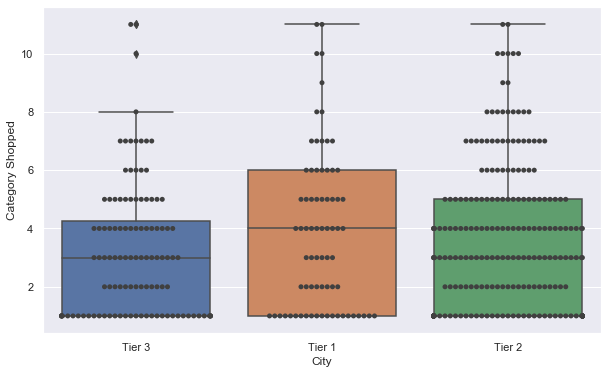

In [15]:

#Setting a size for the graphs.
sns.set(rc={"figure.figsize":(10, 6)})

#Relationship between City tier and the no. of categories one shops.
sns.boxplot(x="City", y="Category Shopped", data=df)
sns.swarmplot(x="City", y="Category Shopped", data=df, color=".25")

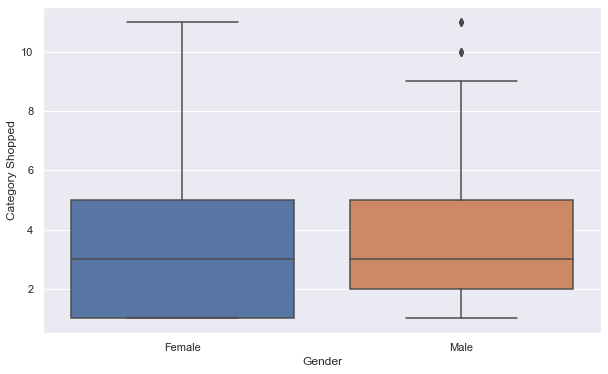

In [16]:
#Relationship b/w Gender and no. of Categories.
sns.boxplot(x="Gender", y="Category Shopped", data=df)

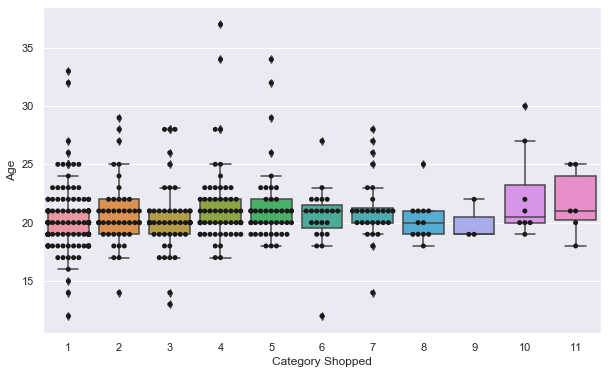

In [18]:
#Relationship b/w Age and no. of Categories.
sns.boxplot(x="Category Shopped", y="Age", data=df)
sns.swarmplot(x="Category Shopped", y="Age", data=df, color=".1")

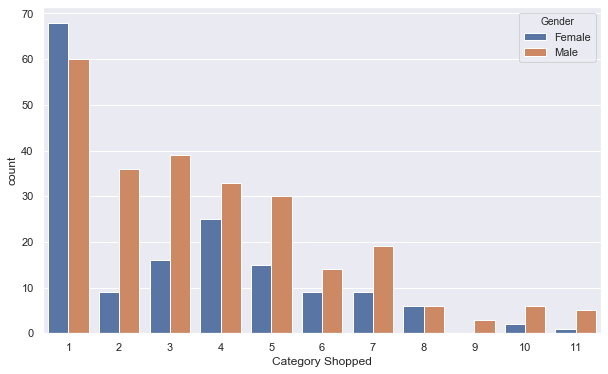

In [167]:
#Relationship b/w Gender and no. of Categories.
sns.countplot(x="Category Shopped", hue="Gender", data=df)

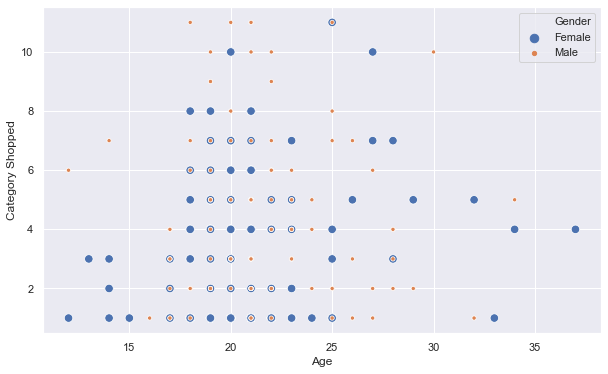

In [168]:
#Relationship b/w Age, Gender and no of Categories.
sns.scatterplot(data=df, x="Age", y="Category Shopped", hue="Gender",size="Gender")

In [21]:
#importing the responses with individual categories.
df2 = pd.read_excel(r"C:\Users\Shubham\OneDrive\Desktop\Projects\Pt\Data\Flaten responses.xlsx")

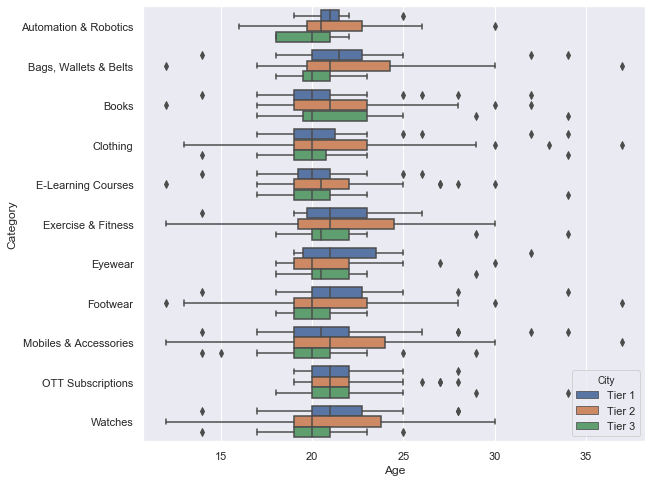

In [26]:
#Checking how the categories are distributed across different age groups of all the three tiers in india.
sns.set(rc={"figure.figsize":(9, 8)})
sns.boxplot(x="Age", y="Category", hue="City",data=df2)

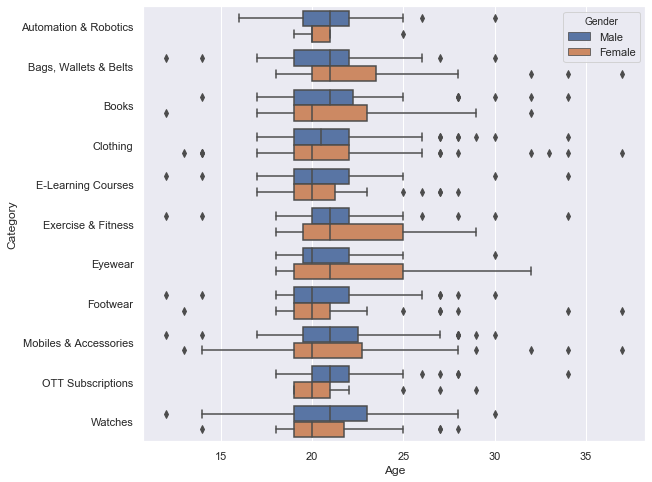

In [27]:
#Checking how the categories are distributed across different age groups in respective genders.
sns.set(rc={"figure.figsize":(9, 8)})
sns.boxplot(x="Age", y="Category", hue="Gender",data=df2)

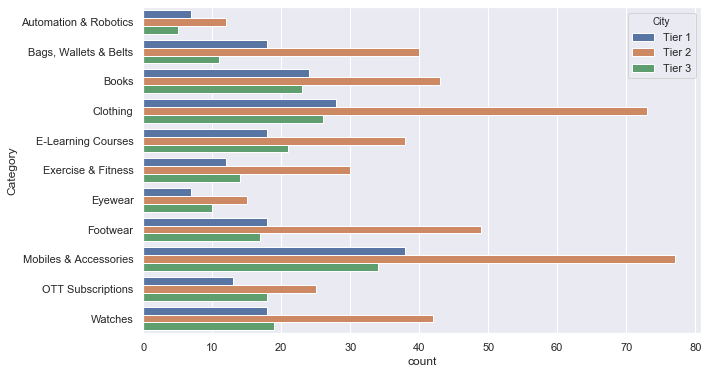

In [24]:
#Relationship b/w City Tier and Categories.
sns.countplot(y="Category", hue="City", data=df2)

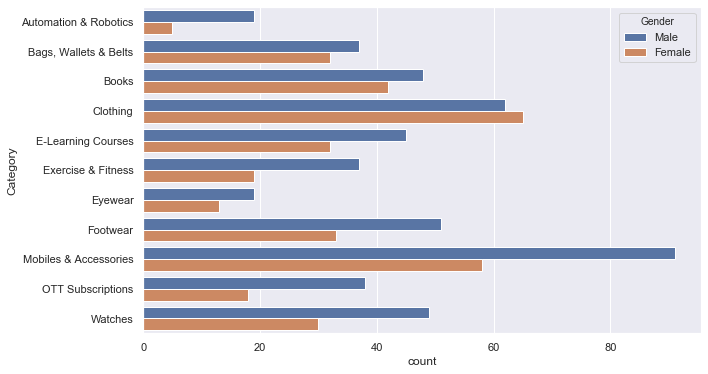

In [28]:
#Relationship b/w Gender and Categories.
sns.countplot(y="Category", hue="Gender", data=df2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C147528948>,
      dtype=object)

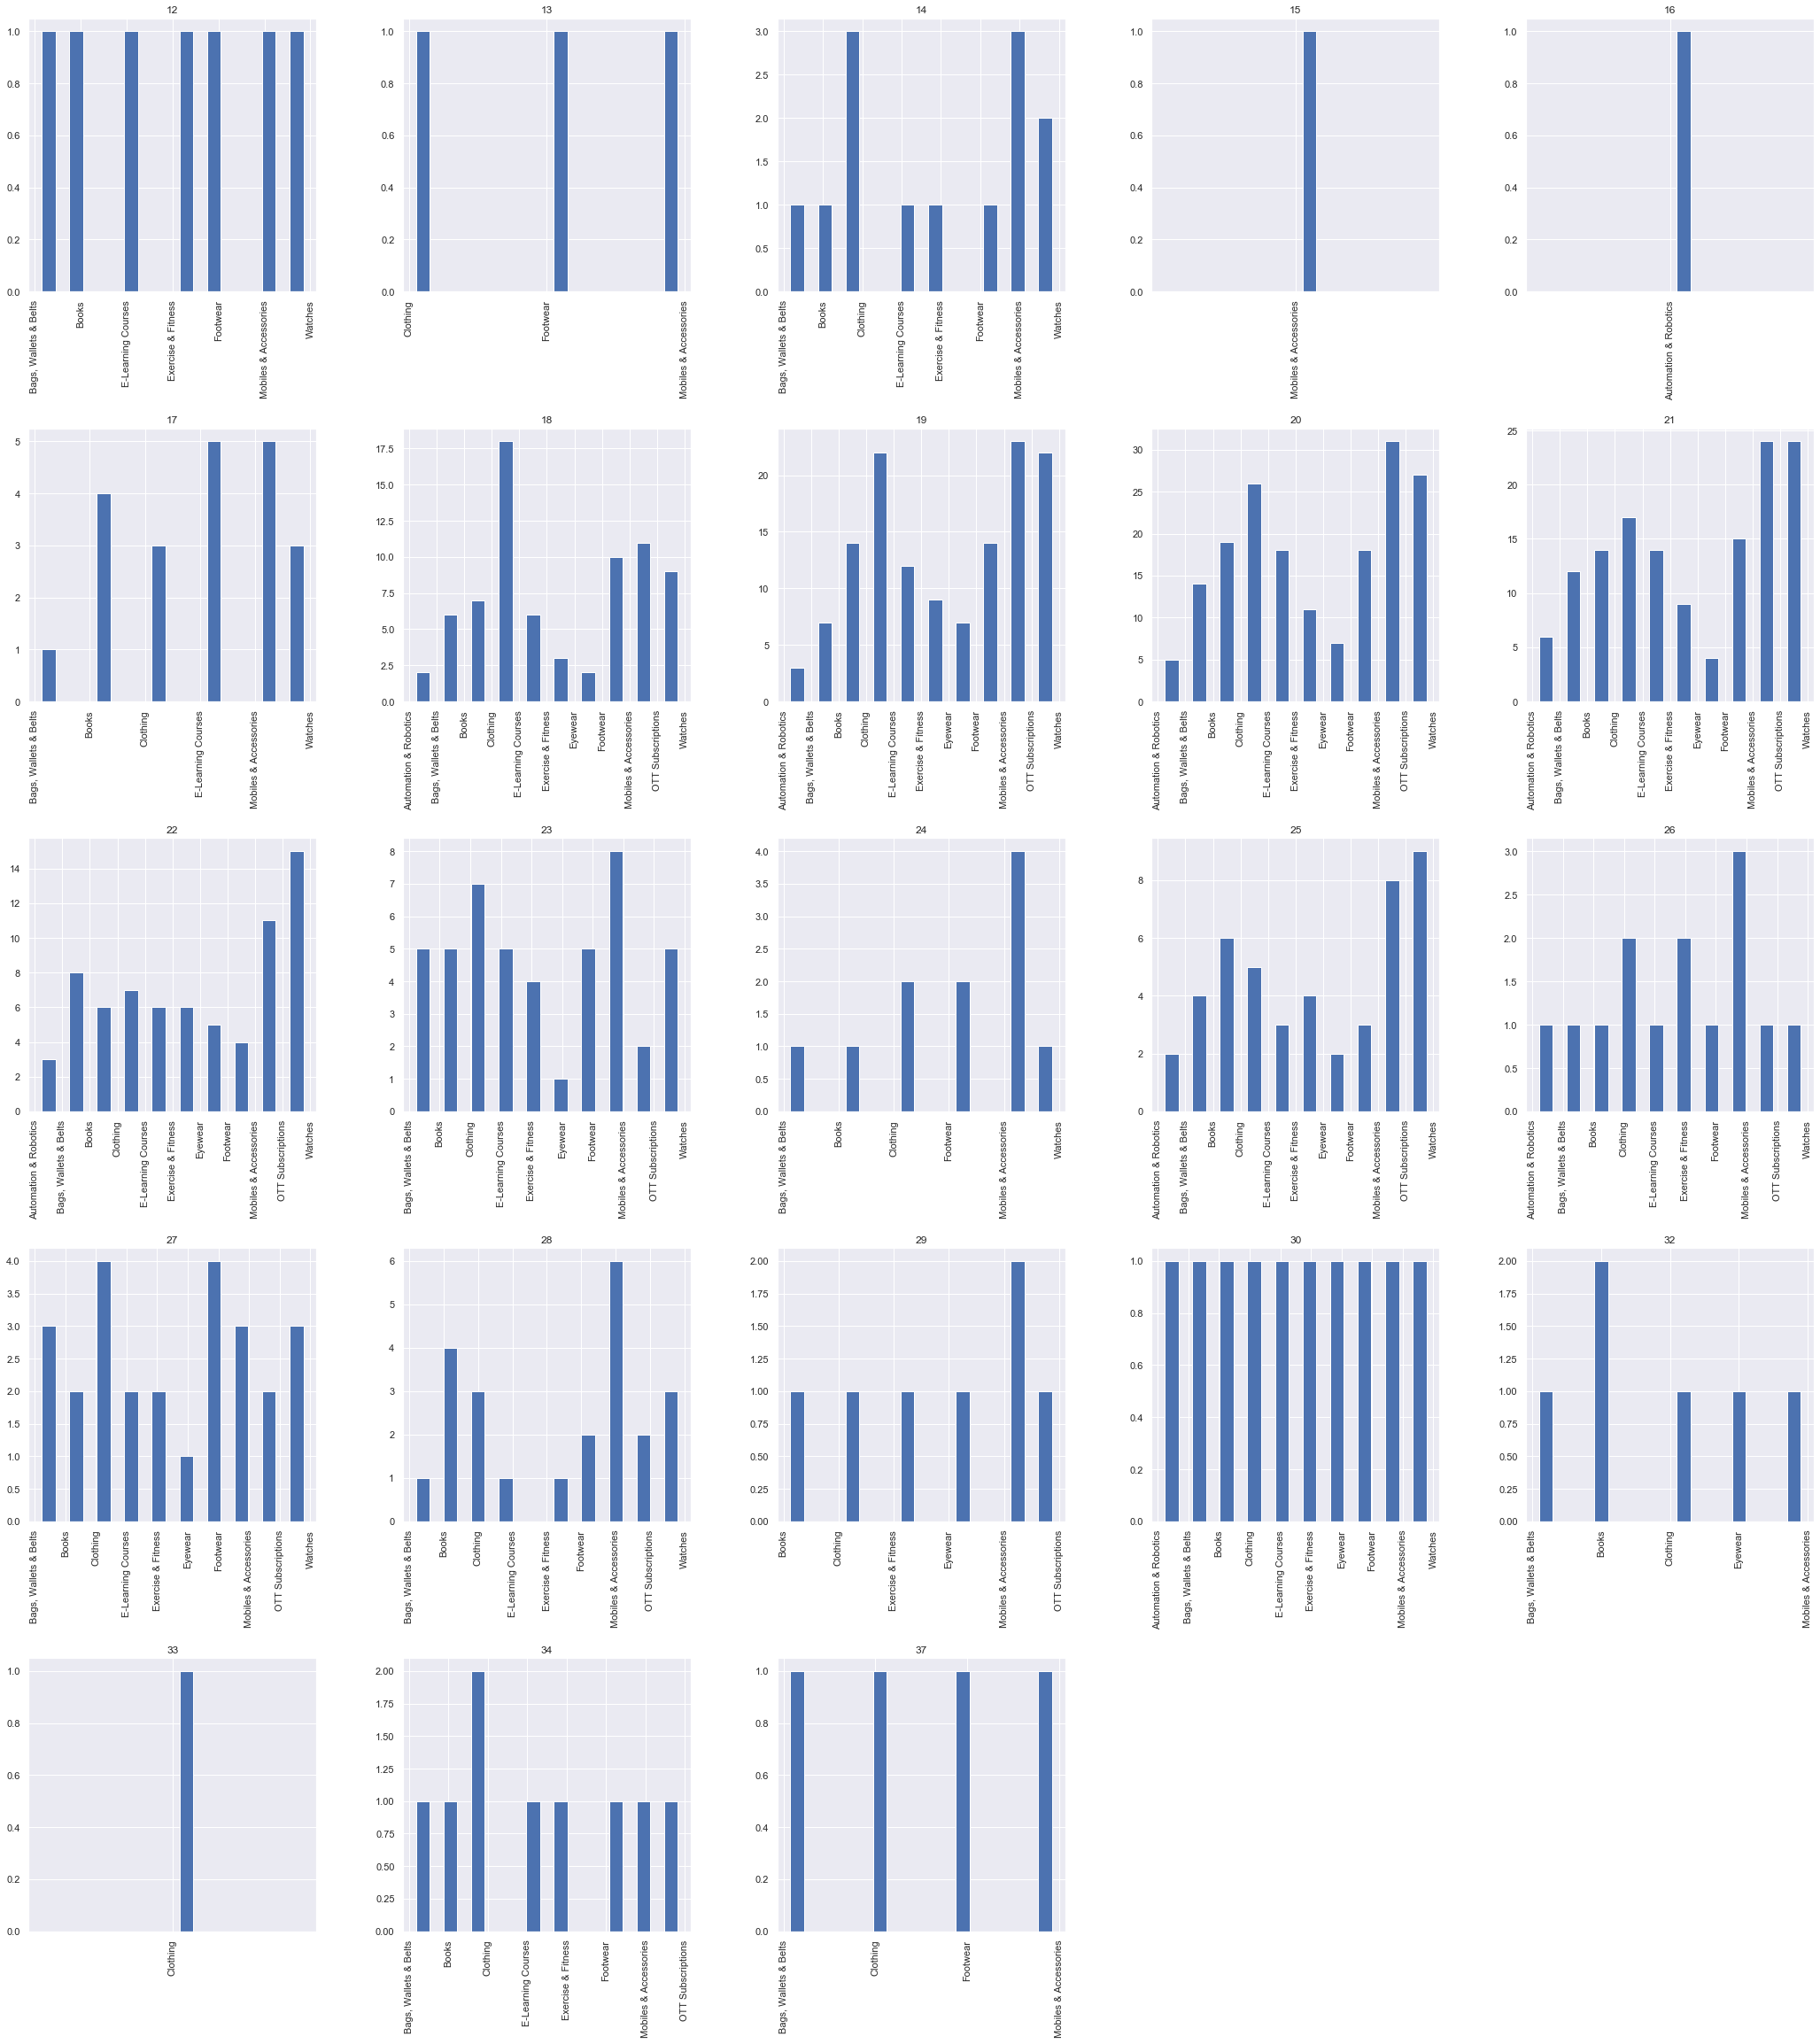

In [53]:
#Relationship b/w Age and Categories.
df2.hist(by='Age',column = 'Category',rwidth=0.5, figsize=(35,40))

## Market Basket Algorithm
> To see the convergence of different categories when people shop.

In [171]:
#Chosing only the categories from the dataframe.
MBasket=df[li]

In [172]:
MBasket

,Mobiles & Accessories,Books,E-Learning Courses,"Bags, Wallets & Belts",Watches,OTT Subscriptions,Footwear,Exercise & Fitness,Eyewear,Automation & Robotics,Clothing
0,True,True,True,True,True,False,True,False,False,False,True
1,True,False,False,True,False,False,True,False,False,False,True
2,True,True,False,False,True,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
406,True,False,False,False,False,False,False,False,False,False,False
407,True,True,False,True,True,False,True,False,False,False,True
408,True,False,False,False,False,False,False,False,False,False,True
409,True,True,True,True,True,False,True,True,False,False,False


In [136]:
#Importing the modules for applying Apriori algorithm and defining the association rules.
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Applying Apriori Algo with min support 0.3.
category = apriori(MBasket, min_support=0.03 , use_colnames=True,)
category

,support,itemsets
0,0.625304,(Mobiles & Accessories)
1,0.527981,(Books)
2,0.335766,(E-Learning Courses)
3,0.253041,"(Bags, Wallets & Belts)"
4,0.299270,(Watches)
...,...,...
843,0.034063,"(Bags, Wallets & Belts, Books, Clothing, Exerc..."
844,0.031630,"(Bags, Wallets & Belts, Clothing, E-Learning C..."
845,0.031630,"(Bags, Wallets & Belts, Clothing, E-Learning C..."
846,0.031630,"(Bags, Wallets & Belts, Books, Clothing, E-Lea..."


In [139]:
#Assosiating the items on the basis of lift > 0.5.
rules = association_rules(category, metric="lift", min_threshold=0.5)

#Chosing the items that are most purchased together and that too with a confidence > 0.5. 
df1=rules[rules['support'] > .24]
sorted_df = df1.sort_values(by='support', ascending=False)
df2=sorted_df[sorted_df['confidence'] > .5]
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Clothing),(Mobiles & Accessories),0.564477,0.625304,0.386861,0.685345,1.096018,0.033892,1.190814
19,(Mobiles & Accessories),(Clothing),0.625304,0.564477,0.386861,0.618677,1.096018,0.033892,1.142137
0,(Books),(Mobiles & Accessories),0.527981,0.625304,0.352798,0.668203,1.068604,0.022650,1.129292
1,(Mobiles & Accessories),(Books),0.625304,0.527981,0.352798,0.564202,1.068604,0.022650,1.083116
36,(Clothing),(Books),0.564477,0.527981,0.321168,0.568966,1.077626,0.023135,1.095085
37,(Books),(Clothing),0.527981,0.564477,0.321168,0.608295,1.077626,0.023135,1.111865
11,(Footwear),(Mobiles & Accessories),0.343066,0.625304,0.291971,0.851064,1.361040,0.077450,2.515815
7,(Watches),(Mobiles & Accessories),0.299270,0.625304,0.267640,0.894309,1.430198,0.080505,3.545199
97,(Footwear),(Clothing),0.343066,0.564477,0.262774,0.765957,1.356933,0.069121,1.860871
21,(E-Learning Courses),(Books),0.335766,0.527981,0.253041,0.753623,1.427369,0.075763,1.915844


## ANN Model:
> A simple prediction model to prdict the categories one shops.

In [173]:
#Dropping State and Category Shopped coulmns.
df = df.drop(['State','Category Shopped'],axis=1)
df

,Age,Gender,City,Mobiles & Accessories,Books,E-Learning Courses,"Bags, Wallets & Belts",Watches,OTT Subscriptions,Footwear,Exercise & Fitness,Eyewear,Automation & Robotics,Clothing
0,20,Female,Tier 3,True,True,True,True,True,False,True,False,False,False,True
1,34,Female,Tier 1,True,False,False,True,False,False,True,False,False,False,True
2,28,Male,Tier 1,True,True,False,False,True,False,True,False,False,False,False
3,26,Male,Tier 1,True,False,False,False,False,False,False,False,False,False,False
4,26,Female,Tier 1,True,True,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,18,Male,Tier 1,True,False,False,False,False,False,False,False,False,False,False
407,18,Male,Tier 1,True,True,False,True,True,False,True,False,False,False,True
408,18,Male,Tier 2,True,False,False,False,False,False,False,False,False,False,True
409,14,Male,Tier 1,True,True,True,True,True,False,True,True,False,False,False


In [174]:
#Importing Label encoder for ordinal encoding.
from sklearn.preprocessing import LabelEncoder
c=LabelEncoder()

#Encoding the city tiers to 0, 1 and 2.
my_array = df.iloc[:,:].values
my_array[:,2] = c.fit_transform(my_array[:,2])
dfy=pd.DataFrame(my_array)
dfy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,20,Female,2,True,True,True,True,True,False,True,False,False,False,True
1,34,Female,0,True,False,False,True,False,False,True,False,False,False,True
2,28,Male,0,True,True,False,False,True,False,True,False,False,False,False
3,26,Male,0,True,False,False,False,False,False,False,False,False,False,False
4,26,Female,0,True,True,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,18,Male,0,True,False,False,False,False,False,False,False,False,False,False
407,18,Male,0,True,True,False,True,True,False,True,False,False,False,True
408,18,Male,1,True,False,False,False,False,False,False,False,False,False,True
409,14,Male,0,True,True,True,True,True,False,True,True,False,False,False


In [175]:
#Importing One hot encoder and column tansformer for nominal encoding.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Encoding the genders.
ct=ColumnTransformer( transformers=[("encode",OneHotEncoder(),[1])], remainder="passthrough")
y = ct.fit_transform(my_array)
y

array([[1.0, 0.0, 20, ..., False, False, True],
       [1.0, 0.0, 34, ..., False, False, True],
       [0.0, 1.0, 28, ..., False, False, False],
       ...,
       [0.0, 1.0, 18, ..., False, False, True],
       [0.0, 1.0, 14, ..., False, False, False],
       [0.0, 1.0, 19, ..., False, False, True]], dtype=object)

In [330]:
#Importing keras and other dependencies. 
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

#Seperating input and output form the array.
X=y[:,:4]
y1 = y[:,4:]

#Splitting the trian and test data.
X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size = 0.1)

#Creating the sequential model with 4 input + 11 output dense layers with sigmoid activation.
model = Sequential()
model.add(Dense(4, input_dim=4, activation='sigmoid'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(22, activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='SGD',metrics=['accuracy'])

#Training model.
history = model.fit(X_train, y_train, epochs=50,batch_size= 5)

Epoch 1/50
369/369 [==============================] - 1s 3ms/step - loss: 8.2457 - accuracy: 0.0434
Epoch 2/50
369/369 [==============================] - 0s 766us/step - loss: 8.0172 - accuracy: 0.0921
Epoch 3/50
369/369 [==============================] - 0s 743us/step - loss: 7.9158 - accuracy: 0.0921
Epoch 4/50
369/369 [==============================] - 0s 755us/step - loss: 7.8677 - accuracy: 0.0921
Epoch 5/50
369/369 [==============================] - 0s 797us/step - loss: 7.8445 - accuracy: 0.0921
Epoch 6/50
369/369 [==============================] - 0s 819us/step - loss: 7.8331 - accuracy: 0.5691
Epoch 7/50
369/369 [==============================] - 0s 805us/step - loss: 7.8276 - accuracy: 0.6152
Epoch 8/50
369/369 [==============================] - 0s 832us/step - loss: 7.8246 - accuracy: 0.6152
Epoch 9/50
369/369 [==============================] - 0s 836us/step - loss: 7.8235 - accuracy: 0.6152
Epoch 10/50
369/369 [==============================] - 0s 817us/step - loss: 7.8224 

In [331]:
#Predicting the values.
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [332]:
#Predictions before converting to labels.
y_pred

array([[0.8229083 , 0.7041107 , 0.4307629 , 0.3384428 , 0.39010102,
        0.28502047, 0.44514588, 0.25628754, 0.13413593, 0.09865966,
        0.7664082 ],
       [0.82291687, 0.70412976, 0.43075755, 0.33844453, 0.39010295,
        0.2850079 , 0.44513974, 0.2562734 , 0.1341303 , 0.09865502,
        0.7663975 ],
       [0.8228938 , 0.7040669 , 0.43077153, 0.3384322 , 0.39008528,
        0.28504494, 0.4451663 , 0.25632143, 0.1341474 , 0.09866932,
        0.76643884],
       [0.82289183, 0.704081  , 0.43077332, 0.33844373, 0.3901043 ,
        0.28504246, 0.4451517 , 0.25630867, 0.13414553, 0.09866726,
        0.76642126],
       [0.82291526, 0.70412713, 0.4307586 , 0.33844483, 0.3901036 ,
        0.28501   , 0.44514   , 0.25627518, 0.13413122, 0.09865573,
        0.76639843],
       [0.8229176 , 0.7041332 , 0.43075725, 0.3384459 , 0.3901052 ,
        0.2850064 , 0.44513753, 0.2562706 , 0.13412952, 0.09865433,
        0.7663945 ],
       [0.822911  , 0.7041087 , 0.43076086, 0.33843815, 0.

In [333]:
#Checking model accuracy.
from sklearn.metrics import accuracy_score

a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 71.42857142857143


# Observations:
> 1. Gender: Females ususally shop just a single category. Both the genders shop 3 categories on an average. Top purchases for **Males** are **Mobile and accessories, Clothes, Footwear, Books, Watches, E learning Courses** and then **OTT sub**. While for **females** are **Clothes, Mobile and accessories, Books, Watches, Bags Wallets & Belts** and then **Footwear.**
> 2. City Tier: Mostly people of Tier 2 and Tier 3 shop 3 categories on an average, While 4 are of Tier 1. Top purchases for **Tier 1** are **Mobile and accessories, Clothes, Footwear, Books, Watches,Bags, Wallets & Belts** and then **E learning Courses**,for **Tier 2** are **Mobile and accessories, Clothes, Books, Watches,Bags, Wallets & Belts, Footwear** and then **E learning Courses**, While for **Tier 3** are **Mobile and accessories, Clothes, Books, E learning Courses,  Watches,** and then **Footwear.**
> 3. Age: All the people with 19+ age, shop in almost 7 categories.Top purchases for **18** are **Clothes,Mobile and accessories, Footwear, Books, E-Learning Courses** and **Bags**,for **19** are **Mobile and accessories, Watches, clothes, Books, Footwear, E-Learning Courses** and **Exercise and Fitness**,for **20** are **Mobile and accessories, Watches, clothes, Books, E-Learning Courses** and **Footwear**, for **21** are **Mobile and accessories, Watches, clothes, Books, Footwear, E-Learning Courses** and **Bags, Wallets & Belts**, for **22** are **Mobile and accessories, Watches, Books, clothes, Books** and **E-Learning Courses**, for **23** are **Mobile and accessories, Clothes** mostly and **Books, E-Learning Courses, Footwear and Watches** almost equally.
> 4. Convergence of Categories: Almost all the catgories are followed by **Mobile and Accessories and Clothes** but **E-Learning Courses** are followed by **Books**.

# Results:
> **The following are are the respective most important factors that govern the likelihood of a particular product:**
<br>*Mobiles & Accessories* : Age
<br>*Books* : Gender
<br>*E-Learning Courses* : Age
<br>*Bags, Wallets & Belts* : Gender
<br>*Watches* : City Tier
<br>*OTT Subscriptions* : Age 
<br>*Footwear* : Gender
<br>*Exercise & Fitness* : City Tier
<br>*Eyewear*: City Tier
<br>*Automation & Robotics* : City Tier
<br>*Clothing* : Gender